In [1]:
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice

%matplotlib widget
plt.style.use('presentation.mplstyle')


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
all_analysis_folders = get_analysis_folders()


In [3]:
plates = [
    "26_20210104",
    "52_20220707",
    "56_20220701",
    "59_20201126",
    "69_20201119",
    "76_20210108",
    "81_20220704",
    "84_20220621",
    "94_20201123",
    "102_20201226",
    "152_20201224",
    "792_20210915",
    "799_20211001"
    
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]

In [4]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,use_saved=False)
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,use_saved=False)

In [5]:
time_plate_info['anastomosis'] = time_plate_info['num_edges_study']-time_plate_info['num_nodes_study']+2
time_plate_info['anastomosis_density']=time_plate_info['anastomosis']/time_plate_info['tot_length_study']
time_plate_info['branching'] = time_plate_info['anastomosis']+time_plate_info['num_tips_study']
time_plate_info['branching_density']=time_plate_info['branching']/time_plate_info['tot_length_study']
time_plate_info['day'] = (time_plate_info["time_since_begin_h"]/24).astype(int)
time_plate_info['4h'] = (time_plate_info["time_since_begin_h"]/4).astype(int)

In [6]:
path_figure = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\HFSP_symbiotic-networks\Article_TravellingWave\Figure2.5"


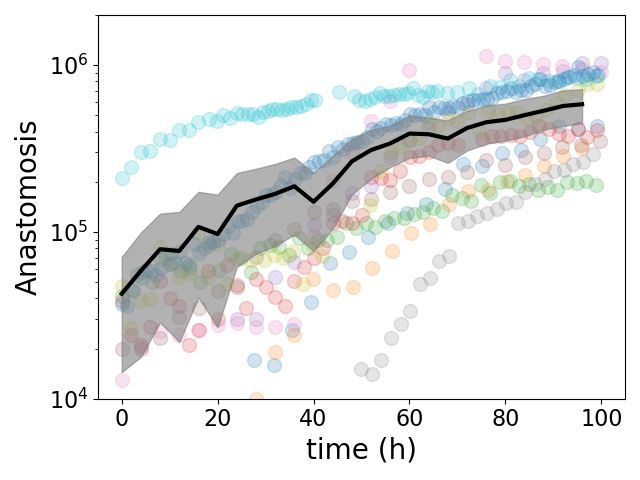

In [7]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "anastomosis"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

ax.set_yscale('log')
# ax.legend()
ax.set_ylim(1e4,2e6)
ax.set_xlabel('time (h)')
ax.set_ylabel('Anastomosis')
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5A.png'))


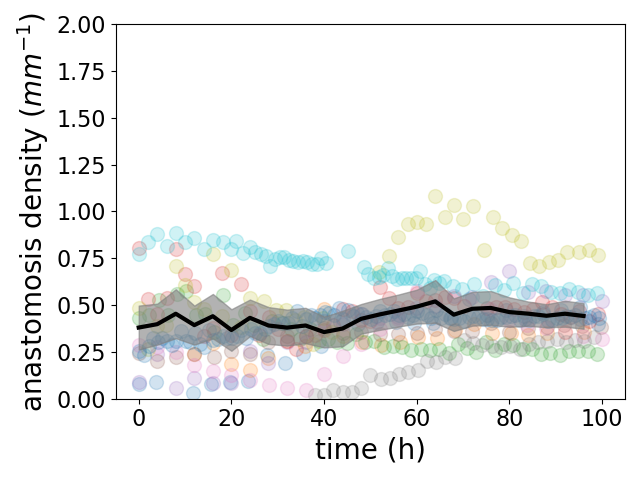

In [8]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "anastomosis_density"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

# ax.set_yscale('log')
# ax.legend()
ax.set_ylim(0,2)
ax.set_xlabel('time (h)')
ax.set_ylabel('anastomosis density ($mm^{-1}$)')
# plt.savefig(os.path.join(path_figure,'Figure2.5A.EPS'))
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5B.png'))


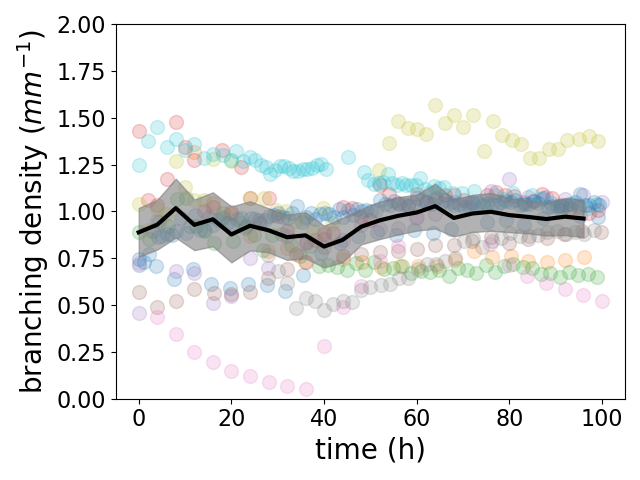

In [9]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "branching_density"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

# ax.set_yscale('log')
# ax.legend()
ax.set_ylim(0,2)
ax.set_xlabel('time (h)')
ax.set_ylabel('branching density ($mm^{-1}$)')
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5D.png'))


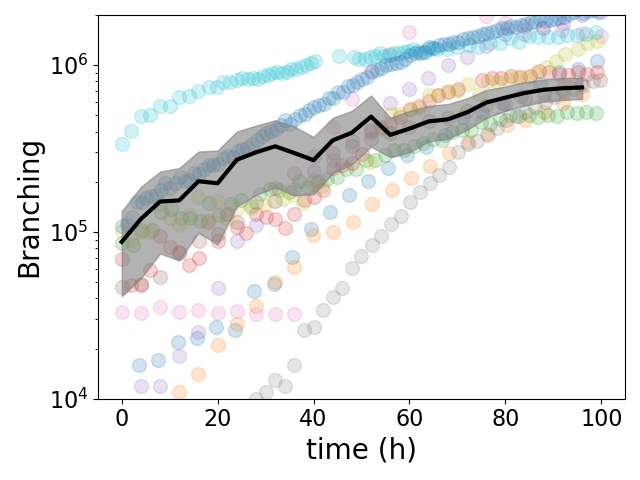

In [72]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "branching"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

ax.set_yscale('log')
# ax.legend()
ax.set_ylim(1e4,2e6)
ax.set_xlabel('time (h)')
ax.set_ylabel('Branching')
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5C.png'))


In [ ]:
plt.close('all')
tables = {}
for plate in plates:
    global_hypha_plate = global_hypha_info.loc[global_hypha_info['unique_id'].astype(str)==str(int(plate))]
    select_movements = select_movement(plate,time_hypha_info,1)
    hyphae_select = select_movements['end'].unique()
    select_hypha = global_hypha_plate.loc[global_hypha_plate['index'].isin(hyphae_select)]
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'].astype(str)==str(int(plate))]
    time_plate_info_plate = time_plate_info_plate.set_index('timestep',drop=False)
    time_plate_info_plate = time_plate_info_plate.sort_values("time_since_begin_h")
    time_plate_info_plate['num_tips_active'] = select_movements.groupby('timestep').count()['end']
    # time_plate_info_plate['num_tips_active'] = time_plate_info_plate['num_anastomosis'].fillna(0)
    tables[plate] = time_plate_info_plate
    
    fig,ax = plt.subplots()
    ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['num_tips_active'])
    ax.set_xlim(0,110)
    # ax.set_ylim(0,10)
    ax.set_title(f'{plate}')
    ax.set_xlabel('time (h)')
    ax.set_ylabel('number of anastomosis at this timestep')
time_plate_info = time_plate_info.set_index(['unique_id','timestep'],drop=False)

transform = pd.concat([tables[plate].set_index(['unique_id','timestep'],drop=False) for plate in plates])
time_plate_info['num_tips_active'] = transform['num_tips_active']   

In [140]:
time_plate_info['branching2'] = time_plate_info['anastomosis']+time_plate_info['num_tips_active']
time_plate_info['branching_density2']=time_plate_info['branching2']/time_plate_info['tot_length_study']

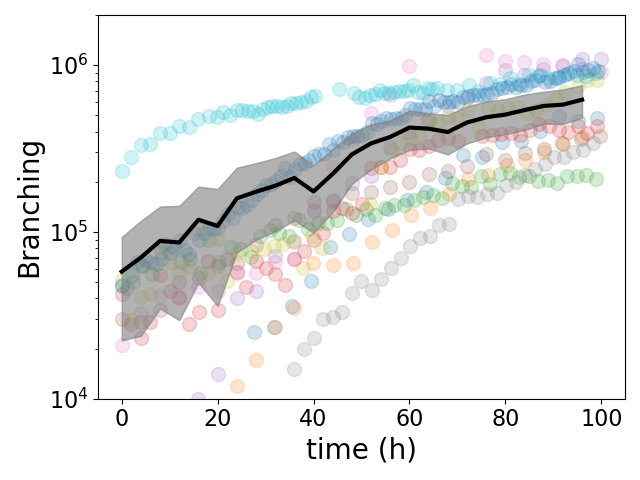

In [148]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "branching2"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

ax.set_yscale('log')
# ax.legend()
ax.set_ylim(1e4,2e6)
ax.set_xlabel('time (h)')
ax.set_ylabel('Branching')
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5Cactive.png'))


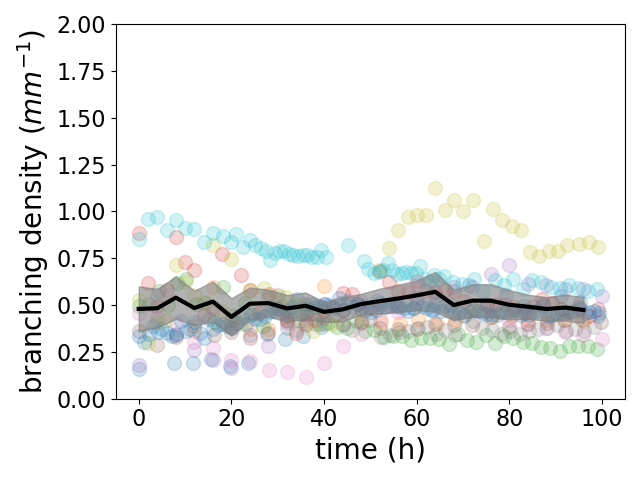

In [152]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "branching_density2"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black")
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)

# ax.set_yscale('log')
# ax.legend()
ax.set_ylim(0,2)
ax.set_xlabel('time (h)')
ax.set_ylabel('branching density ($mm^{-1}$)')
plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5Dactive.png'))


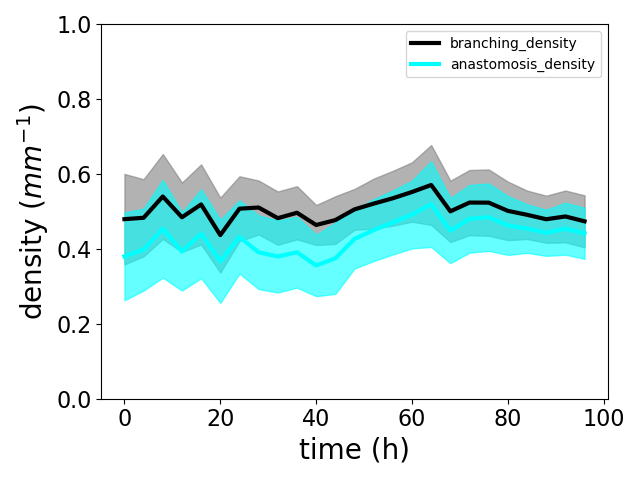

In [157]:
plt.close("all")
# fig,ax = plt.subplots(figsize=(6,2))
fig,ax = plt.subplots()

y = "branching_density2"

# for unique_id in time_plate_info['unique_id'].unique():
#     select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
#     select = select.loc[select['unique_id']==unique_id]
#     select = select.loc[select[y]>0]
#     select = select.sort_values('time_since_begin_h')
#     if len(select)>0:
#         ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="black",label='branching_density')
ax.fill_between(data.index*4, data-err, data+err,color="grey",alpha = 0.6)
# ax2=ax.twinx()
y = "anastomosis_density"

# for unique_id in time_plate_info['unique_id'].unique():
#     select = time_plate_info.loc[time_plate_info['time_since_begin_h']<100]
#     select = select.loc[select['unique_id']==unique_id]
#     select = select.loc[select[y]>0]
#     select = select.sort_values('time_since_begin_h')
#     if len(select)>0:
#         ax.scatter(select["time_since_begin_h"],select[y]*1000,label=unique_id,alpha = 0.2)


table_group = time_plate_info.set_index('unique_id').copy()
table_group = table_group.loc[table_group[y]<1000]
data = table_group.groupby('4h')[y].mean()
data = data.loc[data.index<25]
data*=1000
datastd = table_group.groupby('4h')[y].std()
datastd = datastd.loc[datastd.index<25]
datastd*=1000

datacount = table_group.groupby('4h')[y].count()
datacount = datacount.loc[datacount.index<25]
err = 2*datastd/np.sqrt(datacount)

ax.plot(data.index*4,data,color="cyan",label='anastomosis_density')
ax.fill_between(data.index*4, data-err, data+err,color="cyan",alpha = 0.6)
# ax.set_yscale('log')
# ax.legend()
ax.set_ylim(0,1)
ax.set_xlabel('time (h)')
ax.set_ylabel('density ($mm^{-1}$)')
ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure2.5E.png'))


KeyError: 'day'

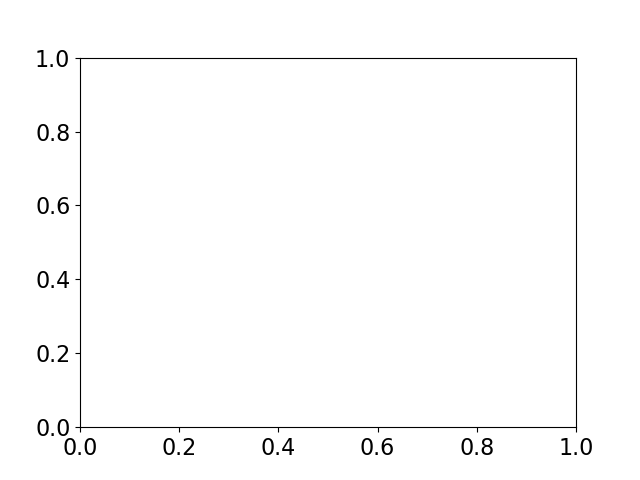

In [5]:
fig,ax = plt.subplots()
y = "num_spores"

# for unique_id in time_plate_info['unique_id'].unique():
#     select = time_plate_info.loc[time_plate_info['time_since_begin_h']<450]
#     select = select.loc[select['unique_id']==unique_id]
#     select = select.loc[select[y]>0]
#     select = select.sort_values('time_since_begin_h')
#     if len(select)>0:
#         ax.plot(select["time_since_begin_h"]/24,select[y]-select[y].iloc[0],label=unique_id,alpha = 0.2)

mini = time_plate_info.groupby('unique_id')[y].min()
maxi = time_plate_info.groupby('unique_id')[y].max()

table_group = time_plate_info.set_index('unique_id').copy()
table_group['mini']= mini
table_group['spore_reduced'] = table_group[y]-table_group['mini']
table_group['maxi']= maxi
table_group = table_group.loc[table_group['maxi']>0]
data = table_group.groupby('day')["spore_reduced"].median()
data = data.loc[data.index<17]

ax.plot(data.index,data)
# ax.set_yscale('log')
# ax.legend()
ax.set_xlabel('time (days)')
ax.set_ylabel('number of spores')
plt.tight_layout()

In [ ]:
fig,ax = plt.subplots()
y = "spore_volume"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<450]
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    if len(select)>0:
        ax.plot(select["time_since_begin_h"]/24,select[y]-select[y].iloc[0],label=unique_id,alpha = 0.2)
mini = time_plate_info.groupby('unique_id')[y].min()
maxi = time_plate_info.groupby('unique_id')[y].max()

table_group = time_plate_info.set_index('unique_id').copy()
table_group['mini']= mini
table_group['spore_reduced'] = table_group[y]-table_group['mini']
table_group['maxi']= maxi
table_group = table_group.loc[table_group['maxi']>0]
data = table_group.groupby('day')["spore_reduced"].median()
data = data.loc[data.index<17]

ax.plot(data.index,data)
ax.set_yscale('log')
# ax.legend()
ax.set_xlabel('time (days)')
ax.set_ylabel('number of spores')
plt.tight_layout()

In [78]:
def select_movement(plate,time_hypha_info,min_num_occ =4):
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id'].astype(str)==str(int(plate))]
    select = time_hypha_plate
    max_speeds = select.groupby('end').max()['speed']
    correct_tracks = max_speeds.loc[max_speeds<=450]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select = select.loc[select['distance_final_pos']>=400]
    select = select.loc[select['speed'].between(50,400)]
    select = select.loc[select['in_ROI']=='True']
    num_occ = select.groupby('end').count()['speed']
    correct_tracks = num_occ.loc[num_occ>=min_num_occ]
    select = select.loc[select['end'].isin(correct_tracks.index)]
    select_movements = select 
    return(select_movements)

def get_average_time_data(plate,time_hypha_info):
    select_movements = select_movement(plate,time_hypha_info)
    group =select_movements.groupby(['time_since_begin_h'])['speed']
    data = group.median()
    dy = group.std()/np.sqrt(group.count())

    return(data,dy,select_movements)

In [29]:
plate = '94_20201123'
plate = '26_20210104'


global_hypha_plate = global_hypha_info.loc[global_hypha_info['unique_id'].astype(str)==str(int(plate))]
select_movements = select_movement(plate,time_hypha_info,1)
hyphae_select = select_movements['end'].unique()
select_hypha = global_hypha_plate.loc[global_hypha_plate['index'].isin(hyphae_select)]
len(global_hypha_plate),len(select_hypha)

(955, 96)

(0.0, 10.0)

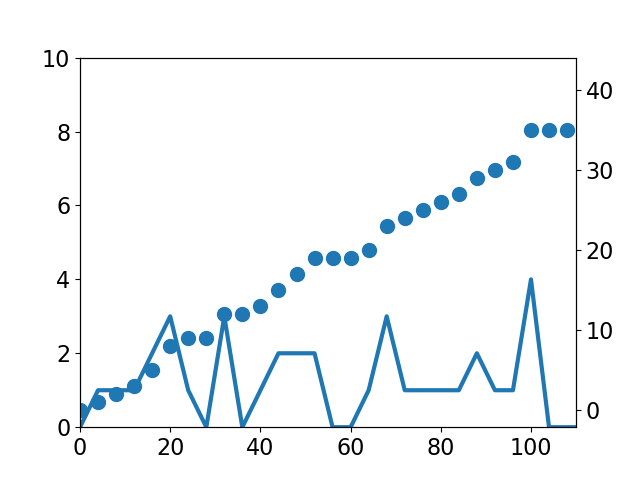

In [30]:

time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'].astype(str)==str(int(plate))]
time_plate_info_plate = time_plate_info_plate.set_index('timestep')
time_plate_info_plate['num_anastomosis'] = select_hypha.groupby('timestep_anastomosis').count()['index'].loc[1:]
time_plate_info_plate['num_anastomosis'] = time_plate_info_plate['num_anastomosis'].fillna(0)
time_plate_info_plate = time_plate_info_plate.sort_values('time_since_begin_h')
fig,ax = plt.subplots()
ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['num_anastomosis'])
# time_plate_info_plate['num_anastomosis'] = global_hypha_plate.groupby('timestep_anastomosis').count()['index'].loc[1:]
# time_plate_info_plate['num_anastomosis'] = time_plate_info_plate['num_anastomosis'].fillna(0)
ax2 = ax.twinx()
ax2.scatter(time_plate_info_plate['time_since_begin_h'],np.cumsum(time_plate_info_plate['num_anastomosis']))
ax.set_xlim(0,110)
ax.set_ylim(0,10)

C:\Users\coren\AppData\Local\Temp\ipykernel_1212\4102180810.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


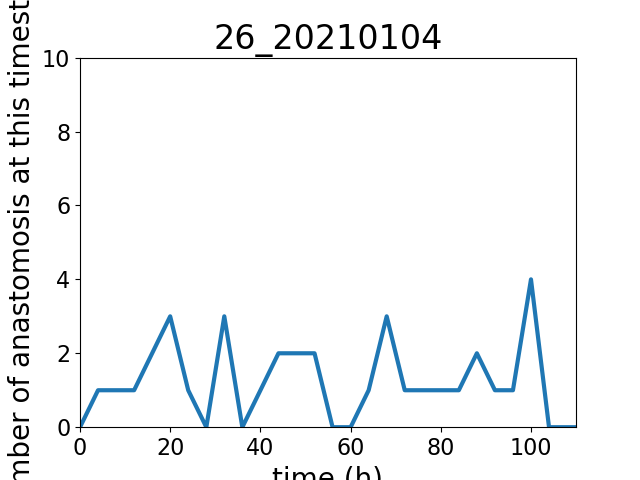

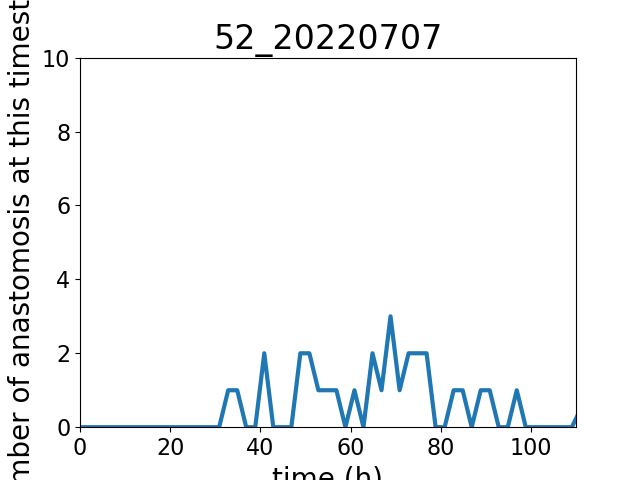

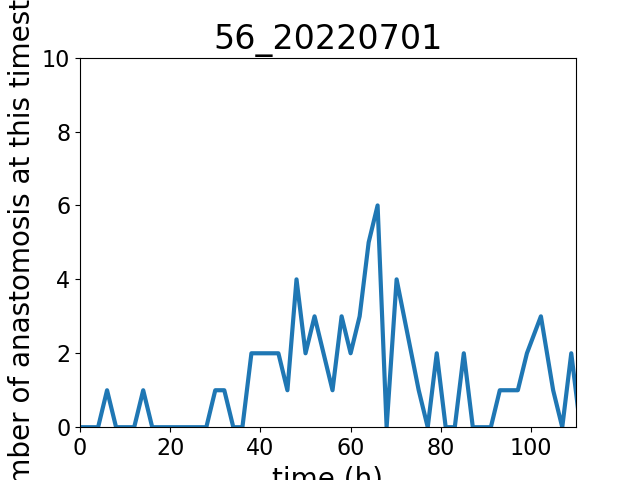

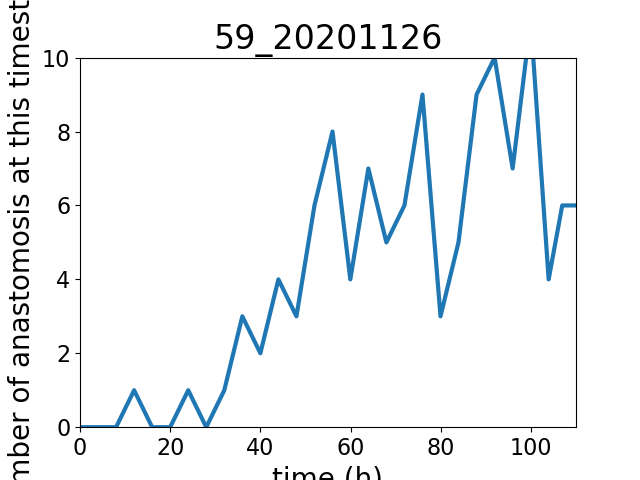

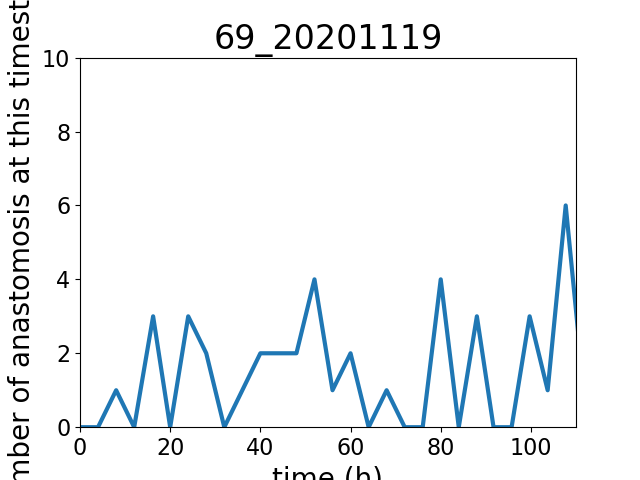

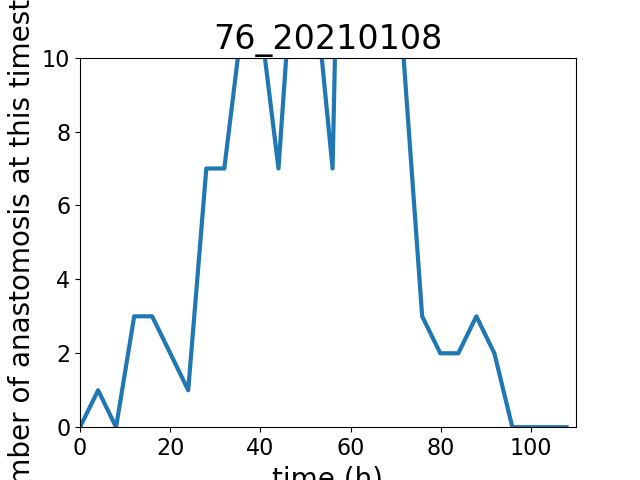

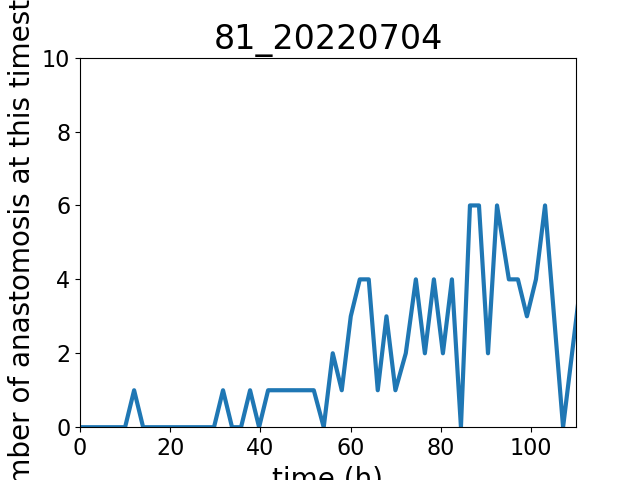

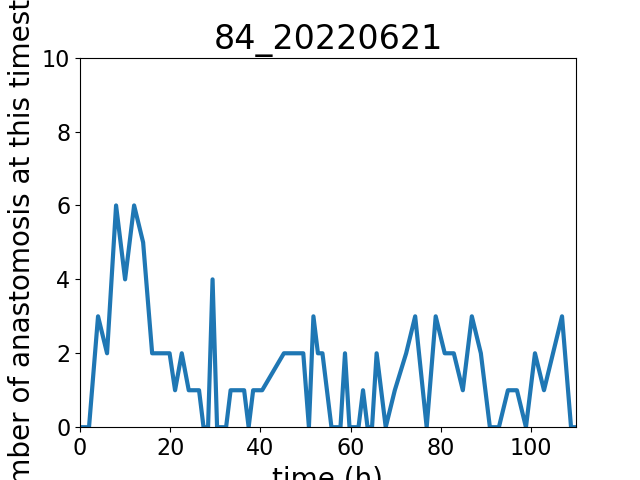

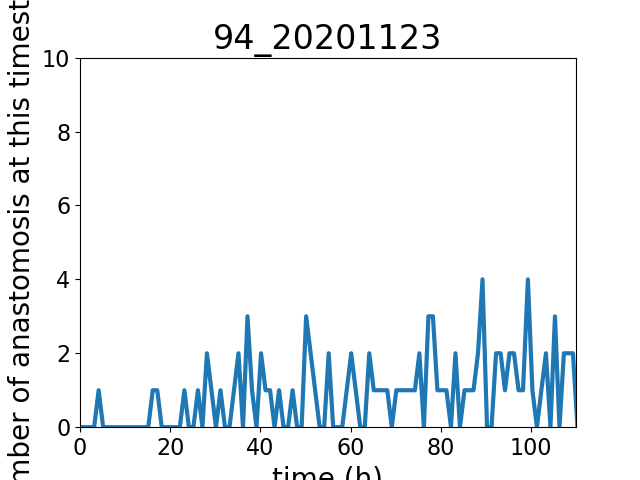

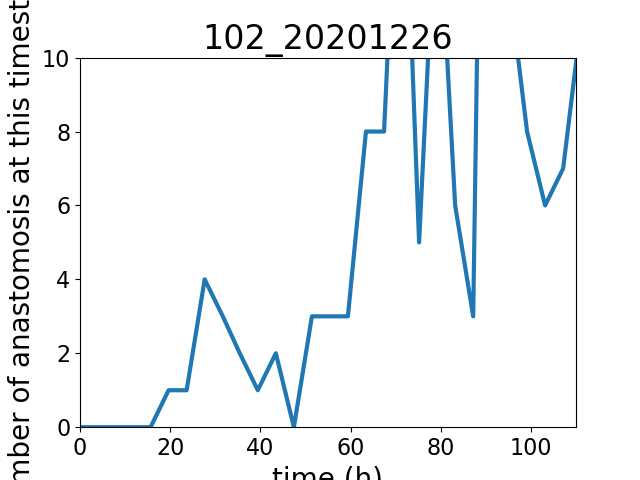

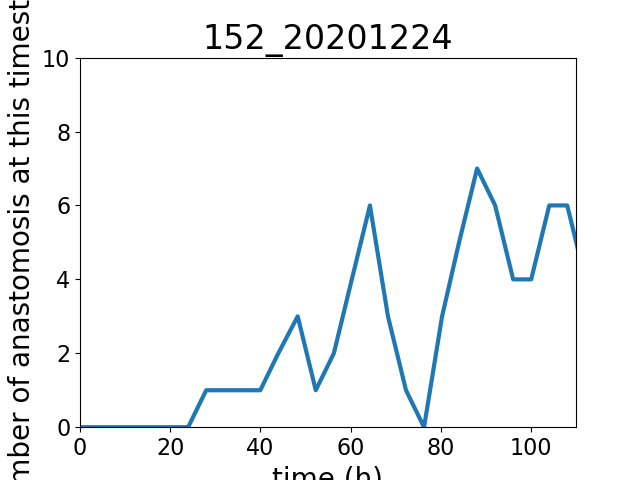

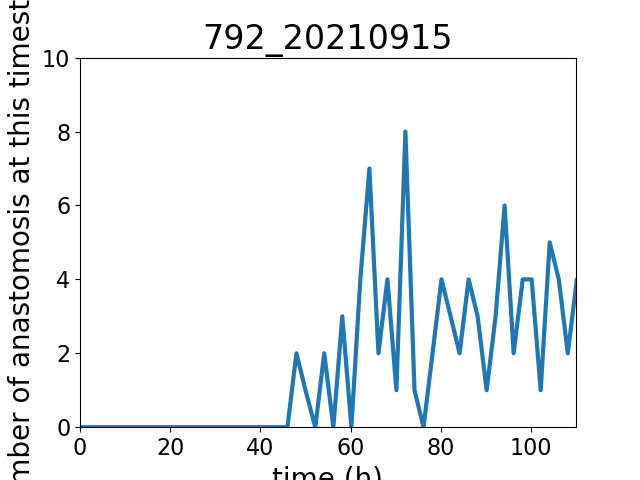

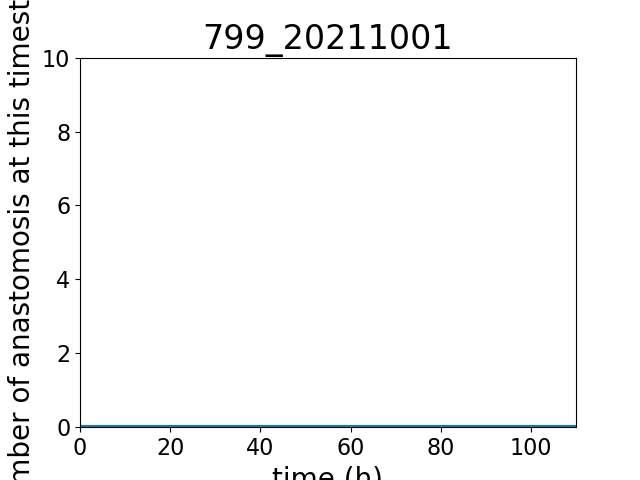

In [31]:
tables = {}
for plate in plates:
    global_hypha_plate = global_hypha_info.loc[global_hypha_info['unique_id'].astype(str)==str(int(plate))]
    select_movements = select_movement(plate,time_hypha_info,1)
    hyphae_select = select_movements['end'].unique()
    select_hypha = global_hypha_plate.loc[global_hypha_plate['index'].isin(hyphae_select)]
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'].astype(str)==str(int(plate))]
    time_plate_info_plate = time_plate_info_plate.set_index('timestep')
    time_plate_info_plate = time_plate_info_plate.sort_values("time_since_begin_h")
    time_plate_info_plate['num_anastomosis'] = select_hypha.groupby('timestep_anastomosis').count()['index'].loc[1:]
    time_plate_info_plate['num_anastomosis'] = time_plate_info_plate['num_anastomosis'].fillna(0)
    tables[plate] = time_plate_info_plate
    fig,ax = plt.subplots()
    ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['num_anastomosis'])
    ax.set_xlim(0,110)
    ax.set_ylim(0,10)
    ax.set_title(f'{plate}')
    ax.set_xlabel('time (h)')
    ax.set_ylabel('number of anastomosis at this timestep')

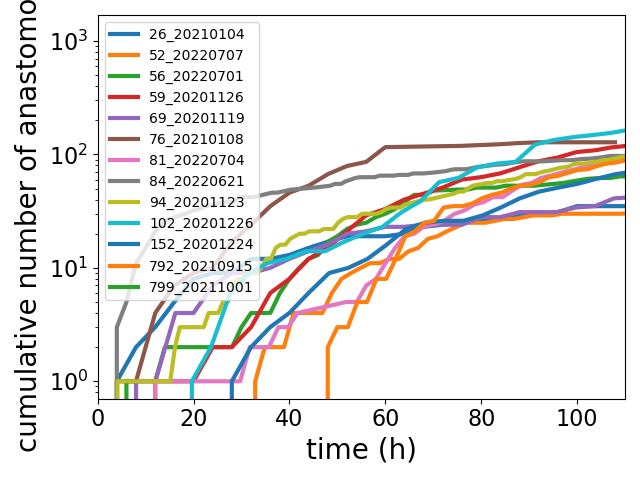

In [32]:
fig,ax = plt.subplots()
for plate in plates:
    time_plate_info_plate = tables[plate]
    ax.plot(time_plate_info_plate['time_since_begin_h'],np.cumsum(time_plate_info_plate['num_anastomosis']),label=plate)
    ax.set_xlim(0,110)
    # ax.set_ylim(0,120)
plt.legend() 
ax.set_xlabel('time (h)')
ax.set_ylabel('cumulative number of anastomosis')
ax.set_yscale('log')
plt.tight_layout()

In [33]:
final_table = pd.DataFrame()
for plate in plates:
    time_plate_info_plate = tables[plate]
    final_table = pd.concat((final_table,time_plate_info_plate[['folder','num_anastomosis','unique_id']]))
final_table['unique_id'] = final_table['unique_id'].astype(str).str[:-8]+"_"+final_table['unique_id'].astype(str).str[-8:]

final_table.to_csv("anastomosis_loreto.csv")

In [130]:
final_table

folder  num_anastomosis     unique_id
timestep                                                      
0         20220707_1458_Plate07              0.0   52_20220707
1         20220707_1715_Plate07              0.0   52_20220707
2         20220707_1915_Plate07              0.0   52_20220707
3         20220707_2115_Plate07              0.0   52_20220707
4         20220707_2315_Plate07              0.0   52_20220707
...                         ...              ...           ...
99        20210928_0308_Plate21             15.0  792_20210915
100       20210928_0908_Plate21             23.0  792_20210915
101       20210928_1508_Plate21              8.0  792_20210915
102       20210928_2108_Plate21              5.0  792_20210915
103       20210929_0308_Plate21              0.0  792_20210915

[1482 rows x 3 columns]

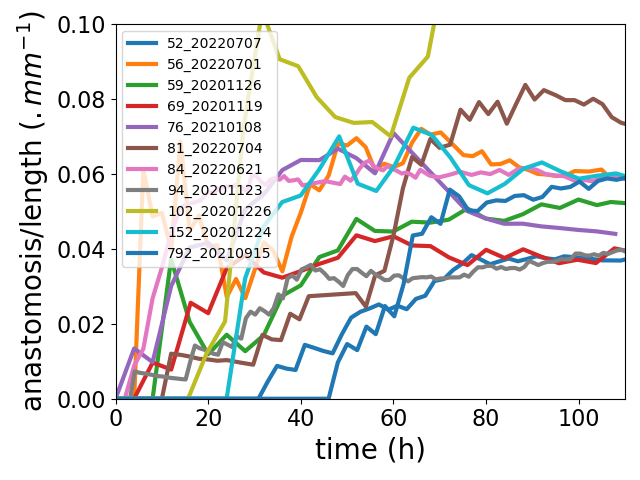

In [20]:
fig,ax = plt.subplots()
for plate in plates:
    time_plate_info_plate = tables[plate]
    ax.plot(time_plate_info_plate['time_since_begin_h'],np.cumsum(time_plate_info_plate['num_anastomosis'])/time_plate_info_plate['tot_length_study']*1000,label=plate)
    ax.set_xlim(0,110)
    ax.set_ylim(0,1e-1)
plt.legend() 
ax.set_xlabel('time (h)')
ax.set_ylabel('anastomosis/length $(.mm^{-1}$)')
plt.tight_layout()

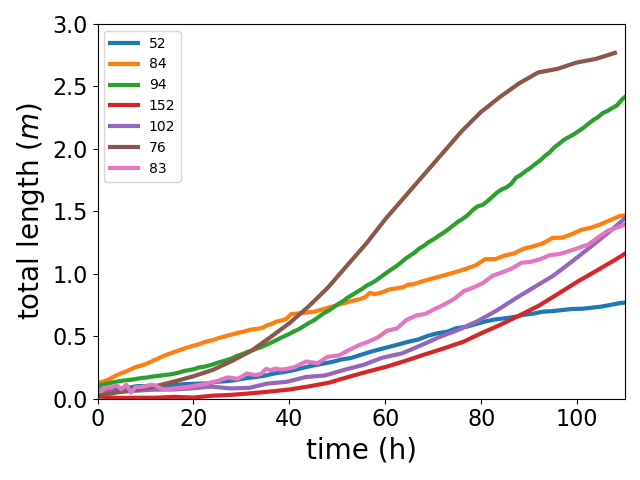

In [84]:
fig,ax = plt.subplots()
for plate in plates:
    time_plate_info_plate = tables[plate]
    ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['tot_length_study']/1e6,label=plate)
    ax.set_xlim(0,110)
    ax.set_ylim(0,3)
plt.legend() 
ax.set_xlabel('time (h)')
ax.set_ylabel('total length ($m$)')
plt.tight_layout()

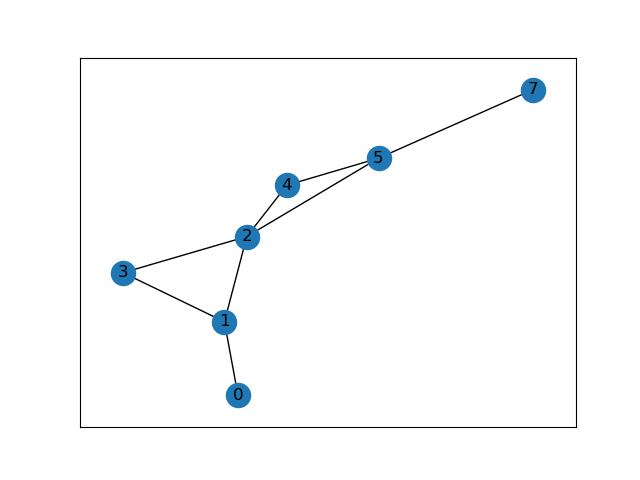

In [57]:
fig,ax = plt.subplots()

import networkx as nx
G = nx.Graph()
G.add_edge(1, 2,weight = 1)
G.add_edge(0, 1,weight = 1)
G.add_edge(1, 3,weight = 1)
G.add_edge(3, 2,weight = 3)
G.add_edge(2, 4,weight = 2)
G.add_edge(2, 5,weight = 1)
G.add_edge(5, 7,weight = 1)
G.add_edge(5, 4,weight = 5)



# nx.draw(G)
nodes=nx.draw_networkx(G)

In [58]:
nx.edge_current_flow_betweenness_centrality_subset(G,[0],[4,7],weight="weight")

{(2, 1): 0.019047619047619053,
 (1, 0): 0.03333333333333333,
 (3, 1): 0.014285714285714287,
 (2, 3): 0.014285714285714294,
 (4, 2): 0.02156862745098039,
 (5, 2): 0.011764705882352944,
 (5, 4): 0.014705882352941199,
 (7, 5): 0.016666666666666677}

In [59]:
nx.edge_current_flow_betweenness_centrality_subset(G,[4,7],[0],weight="weight")

{(2, 1): 0.019047619047619053,
 (1, 0): 0.03333333333333333,
 (3, 1): 0.014285714285714287,
 (2, 3): 0.014285714285714294,
 (4, 2): 0.02156862745098039,
 (5, 2): 0.011764705882352944,
 (5, 4): 0.014705882352941199,
 (7, 5): 0.016666666666666677}

In [51]:
nx.edge_betweenness_centrality_subset(G,[0],[2],weight="weight")

{(1, 2): 0.5, (1, 0): 0.5, (1, 3): 0.0, (2, 3): 0.0}